You may have seen images like this 1000 times, with *some* memorized understanding that the better the orange line hugs the top-left the "better your model is."

Populating the interactive namespace from numpy and matplotlib


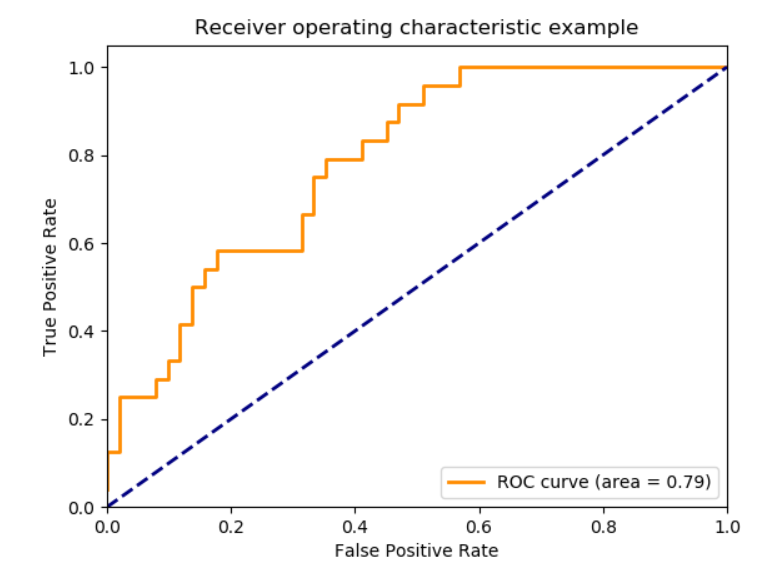

In [1]:
%pylab inline
from IPython.display import Image

Image('images/basic_roc.PNG')

Unpacking *why that's the case* is pretty straight-forward after you frame this info with a a new fundamental assumption:

>The **whole goal of your model** is to figuroute out how to separate your data points into two distributions.

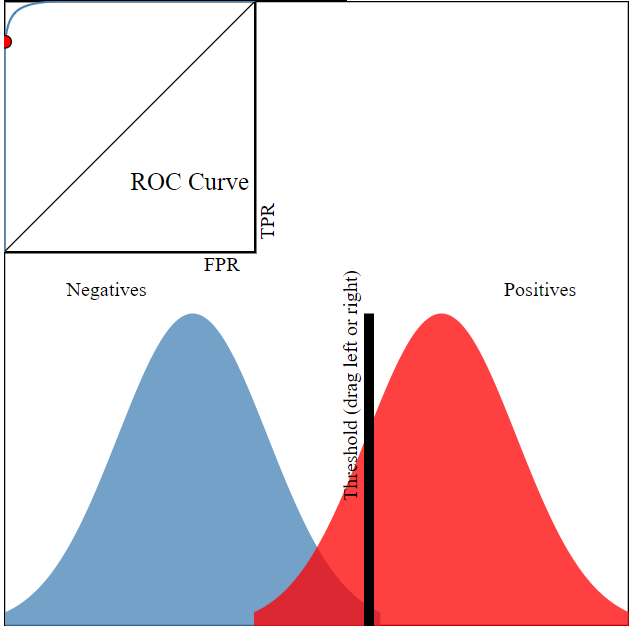

In [2]:
Image('images/two_dist.PNG')

From here, you can set a decision threshold, which yields some confusion matrix.

Say in the example above, we've got

In [3]:
from helpers import print_cm

tn = 240
fn = 50
fp = 10
tp = 200

print_cm([[tn, fn], [fp, tp]])

                     Actual
                  False   True
Predicted  False    240     50
            True     10    200


It seems that we did a reasonable job mitigating false positives at this threshold.

### Stats

Using these values we can calculate, among other things

- True Positive Ratio
- False Positive Ratio

The **True Positive Ratio** is a measure of "how many of ALL TRUE values did we call out?"

$\frac{TP}{TP + FN}$

In [4]:
tp / (tp + fn)

0.8

The **False Positive Ratio** is a measure of "how many of our True predictions were actually False?"

$\frac{FP}{FP + TN}$

In [5]:
fp / (fp + tn)

0.04

But this was just for ONE cherry-picked, example threshold.

At scale, we can generate these statistics for multiple Threshold values at once by using `sklearn.metrics.roc_curve()` which, given imputs `y_true` and `y_score`, tries a bunch of thresholds between `0` and `1` and returns
```
fpr : array, shape = [>2]
    Increasing false positive rates such that element i is the false
    positive rate of predictions with score >= thresholds[i].

tpr : array, shape = [>2]
    Increasing true positive rates such that element i is the true
    positive rate of predictions with score >= thresholds[i].

thresholds : array, shape = [n_thresholds]
    Decreasing thresholds on the decision function used to compute
    fpr and tpr. `thresholds[0]` represents no instances being predicted
    and is arbitrarily set to `max(y_score) + 1`.
```

## Good Model, Bad Model

To restate our earlier assumption, "The whole goal of your model is to figuroute out how to separate your data points into two distributions."

Extending this notion further, we say that a model is "Good" when it separates the `True` and `False` populations as above. Conversely, a model is not so good when it can't separate the two classes, as below.

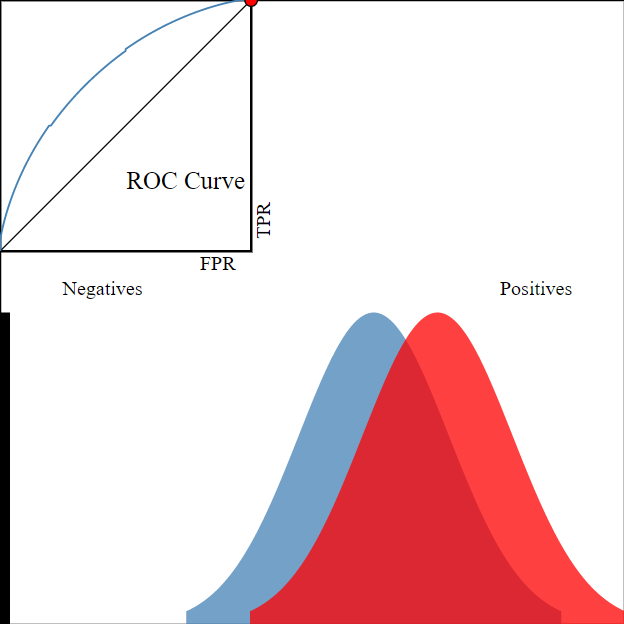

In [6]:
Image('images/bad_model.PNG')

Bringing it home, look at the difference between the ROC for the two models.

You can go into production with any Threshold value you want-- one model is *objectively* better than the other because **at all threshold values** it's as good or better at separating the two populations.

### One Score

While the two-population and adjusting Threshold graphic is helpful for reinforcing intuition, all you need to know is that **maximizing AUC means maximizing the degree of class separability** in your model.

From there, you can do whatever. Depending on your use case, maybe you have a higher tolerance for False Positives and prioritize maximizing the number of True Positives you find, a better model will mean better separability will mean more bang for your buck adjusting the Threshold.

## Sklearn

For concreteness, let's use a simple dummy model to see how to examine AUC statistics in ScikitLearn.

In [7]:
#Make the dataset/train simple Logistic Regression.

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification()

model = LogisticRegression()

model.fit(X, y)
y_pred_probs = model.predict_proba(X)[:, 1]

In [8]:
# examine FPR and TPR at various acceptance thresholds
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y, y_pred_probs)

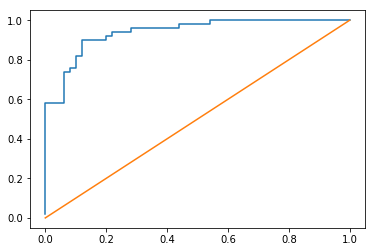

In [9]:
# plot the two against each other
plt.plot(fpr, tpr)
# and a x=y line to show break-even
plt.plot(fpr, fpr);

Pretty good for a dummy model on dummy data

In [10]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, y_pred_probs)

0.93959999999999999

Now say we've decided on an acceptance threshold (in this case `.5`) and we want to take a look at our Confusion Matrix

In [11]:
y_pred = model.predict(X)

In [12]:
from sklearn.metrics import confusion_matrix

print_cm(confusion_matrix(y, y_pred))

                     Actual
                  False   True
Predicted  False     43      7
            True      5     45


### Resources

[This video](https://www.youtube.com/watch?v=OAl6eAyP-yo) and [the accompanying webapp](http://www.navan.name/roc/) were enormous helps in preparing this notebook.